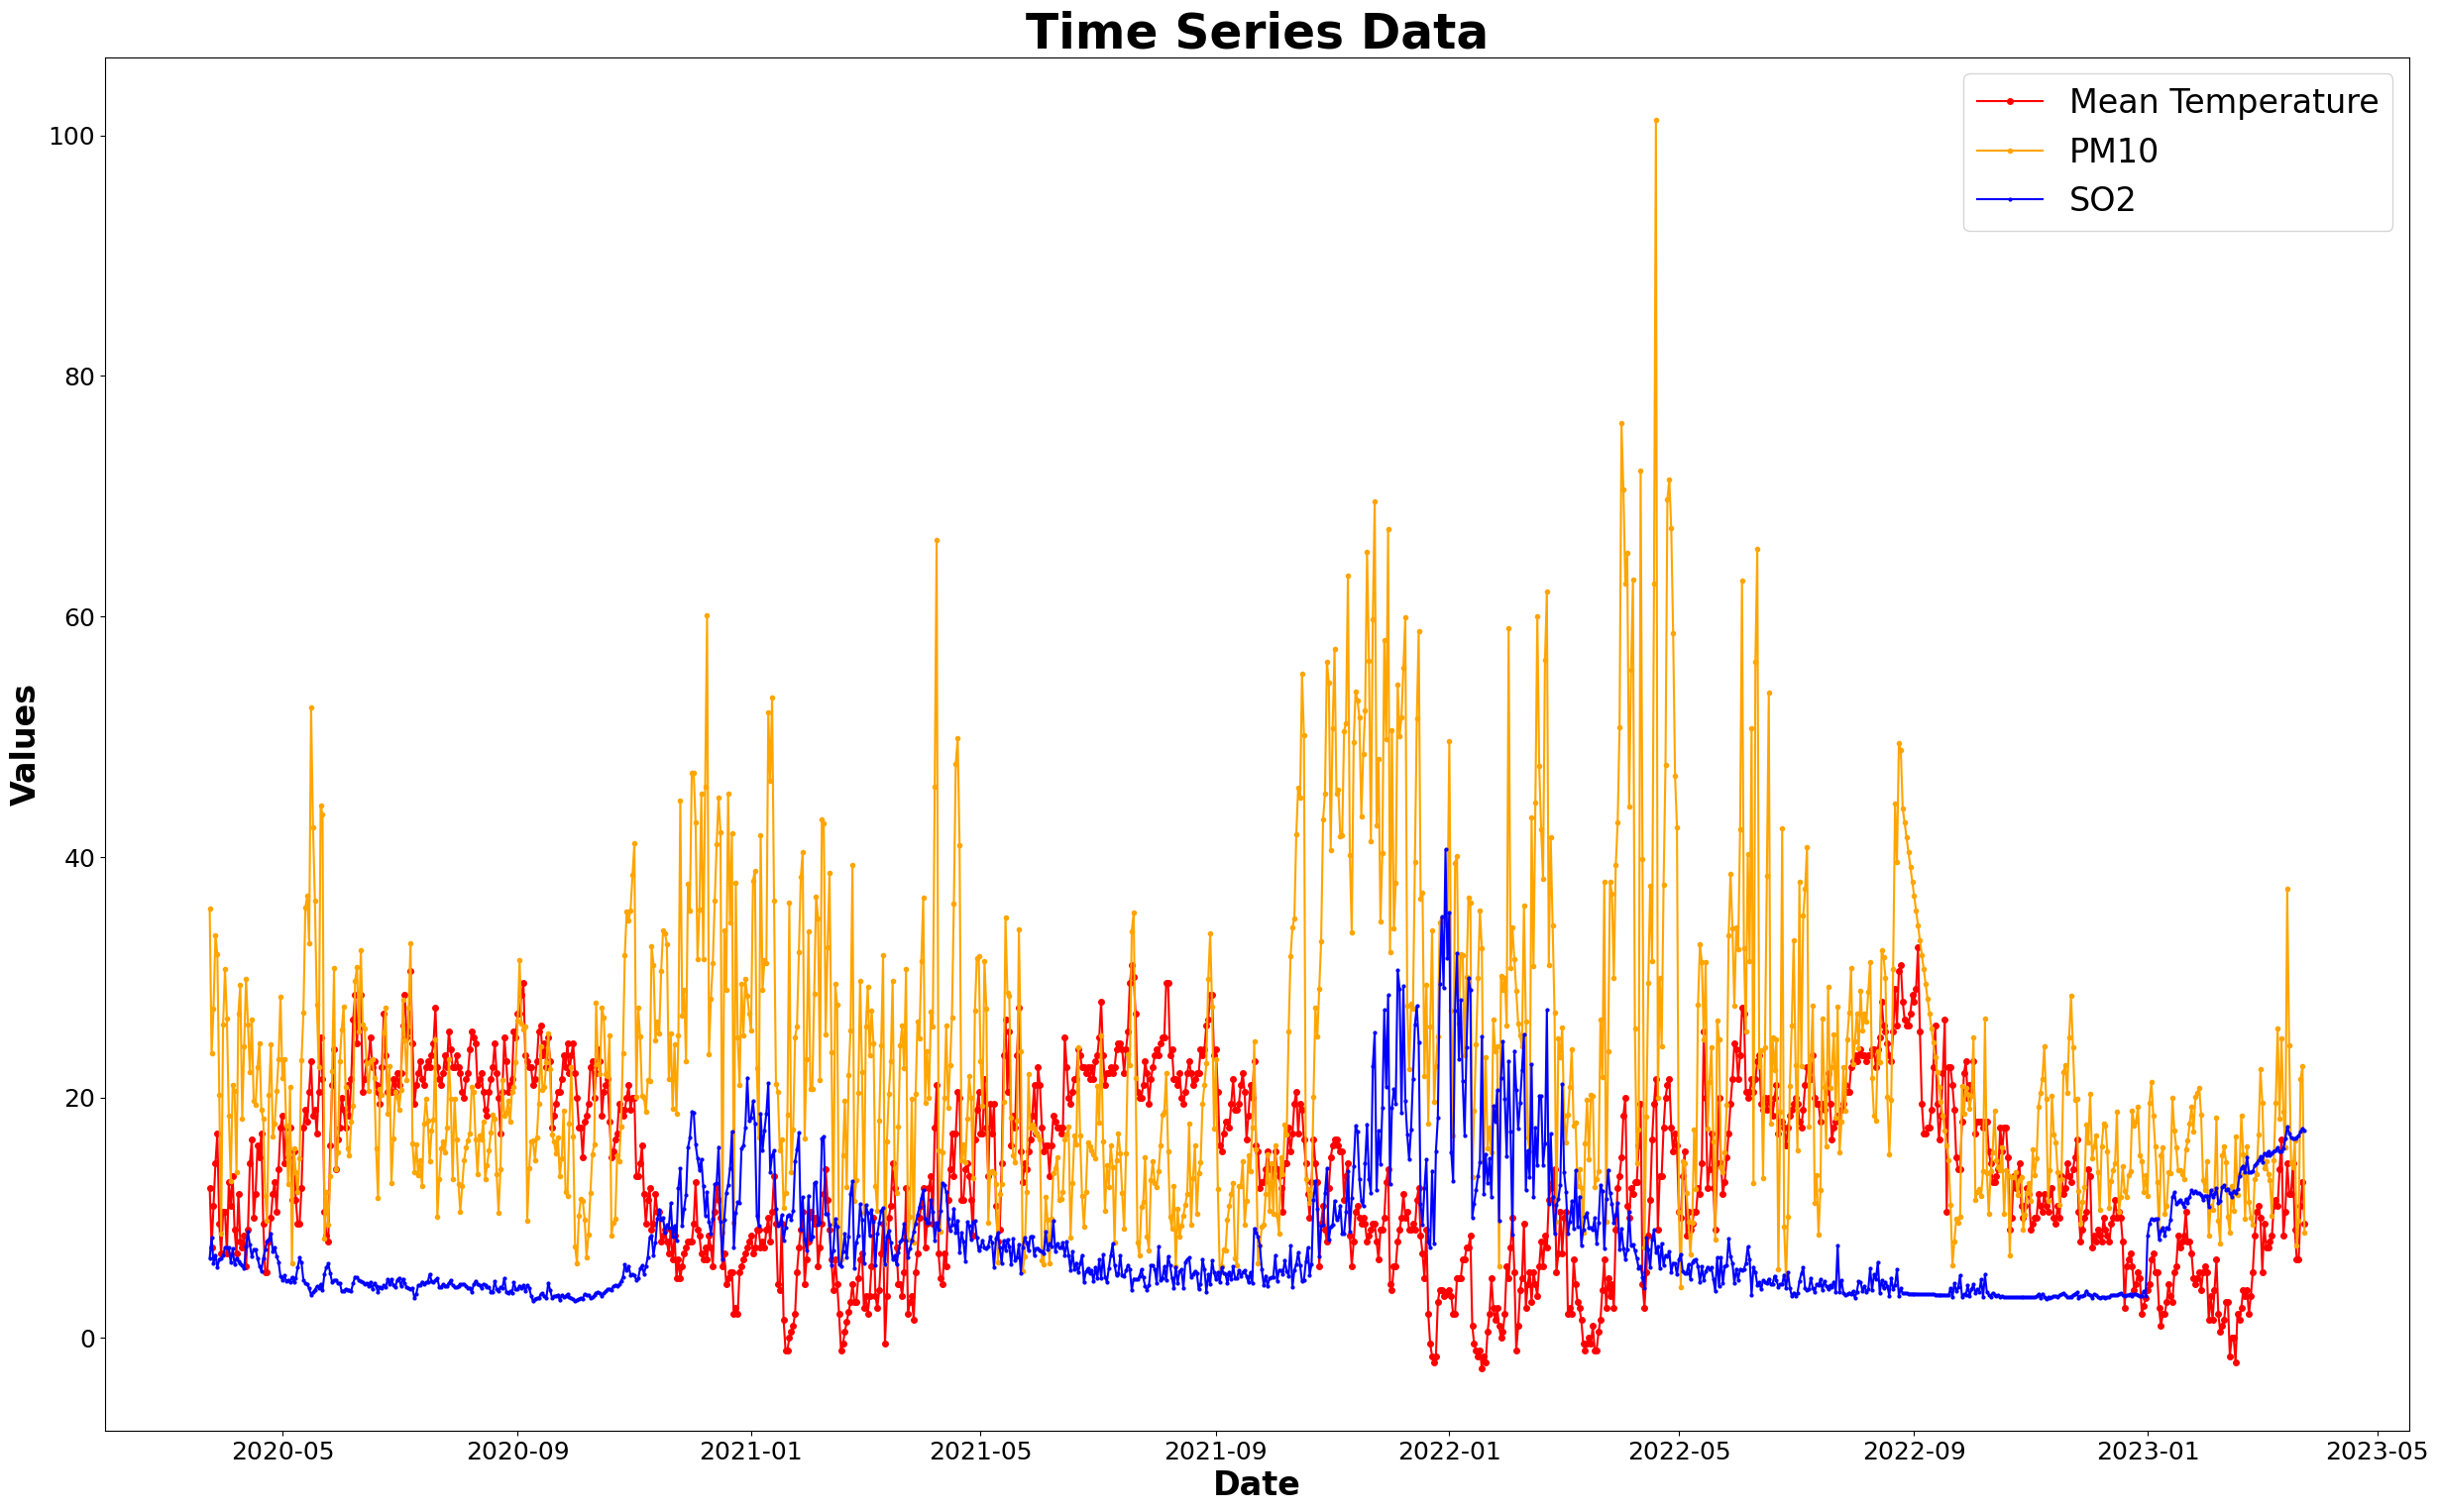

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku ve veri çerçevesini oluştur
data = pd.read_csv('/content/data.csv', decimal=',')

# Tarih sütununu datetime formatına dönüştür
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Tarih sütununu indeks olarak ayarla
data.set_index('Date', inplace=True)

# Boş hücreleri lineer enterpolasyon yöntemiyle doldur
data.interpolate(method='linear', inplace=True)



# Dolu verilerin bulunduğu CSV dosyasını indir
data.to_csv('/content/filled_data.csv')

# Dolu verilerin grafik olarak çizimi
plt.figure(figsize=(30, 18))
plt.plot(data.index, data['Mean Temperature'], marker='o', linestyle='-', color='red', label='Mean Temperature', markersize=4)
plt.plot(data.index, data['PM10'], marker='o', linestyle='-', color='orange', label='PM10', markersize=3)
plt.plot(data.index, data['SO2'], marker='o', linestyle='-', color='blue', label='SO2', markersize=2)
plt.xlabel('Date', fontsize=24, fontweight='bold')
plt.ylabel('Values', fontsize=24, fontweight='bold')
plt.title('Time Series Data', fontsize=35, fontweight='bold')
plt.legend(fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)  # Eksen değerlerinin boyutunu ayarla
plt.grid(False) # Izgarayı kapat

# Grafik göster
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# CSV dosyasını oku ve veri çerçevesini oluştur
data = pd.read_csv('/content/filled_data.csv')

# Sütun isimlerini al
columns = data.columns[1:]

# Boş bir DataFrame oluştur
results = pd.DataFrame(columns=['Column', 'Intercept', 'Coefficient', 'P-value', 'R-squared'])

# Her bir sütun için doğrusal regresyon uygula ve parametreleri hesapla
for column in columns:
    # Doğrusal regresyon modelini oluştur
    regression_model = LinearRegression()

    # Bağımsız değişken (x) olarak zamanı kullanıyoruz
    X = data.index.values.reshape(-1, 1)

    # Hedef değişken (y) olarak sütunu kullanıyoruz
    y = data[column].values

    # Modeli eğit
    regression_model.fit(X, y)

    # Parametreleri al
    intercept = regression_model.intercept_
    coefficient = regression_model.coef_[0]

    # Parametre anlamlılık testi için p değerini hesapla
    y_pred = regression_model.predict(X)
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    var_x = np.var(X)
    p_value = 1 - np.exp(-mse / var_x)

    # R-kare değerini hesapla
    r_squared = r2_score(y, y_pred)

    # Sonuçları DataFrame'e ekle
    results = results.append({
        'Column': column,
        'Intercept': intercept,
        'Coefficient': coefficient,
        'P-value': p_value,
        'R-squared': r_squared
    }, ignore_index=True)

# Tabloyu yazdır
print(results)

# Tabloyu indir
results.to_csv('/content/regression_results.csv', index=False)


             Column  Intercept  Coefficient   P-value  R-squared
0  Mean Temperature  16.861716    -0.005304  0.000560   0.047814
1              PM10  23.864302    -0.000921  0.001637   0.000517
2               SO2   7.081797     0.001951  0.000283   0.013266


<ipython-input-2-3d6cd4e1ec4e>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-2-3d6cd4e1ec4e>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-2-3d6cd4e1ec4e>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


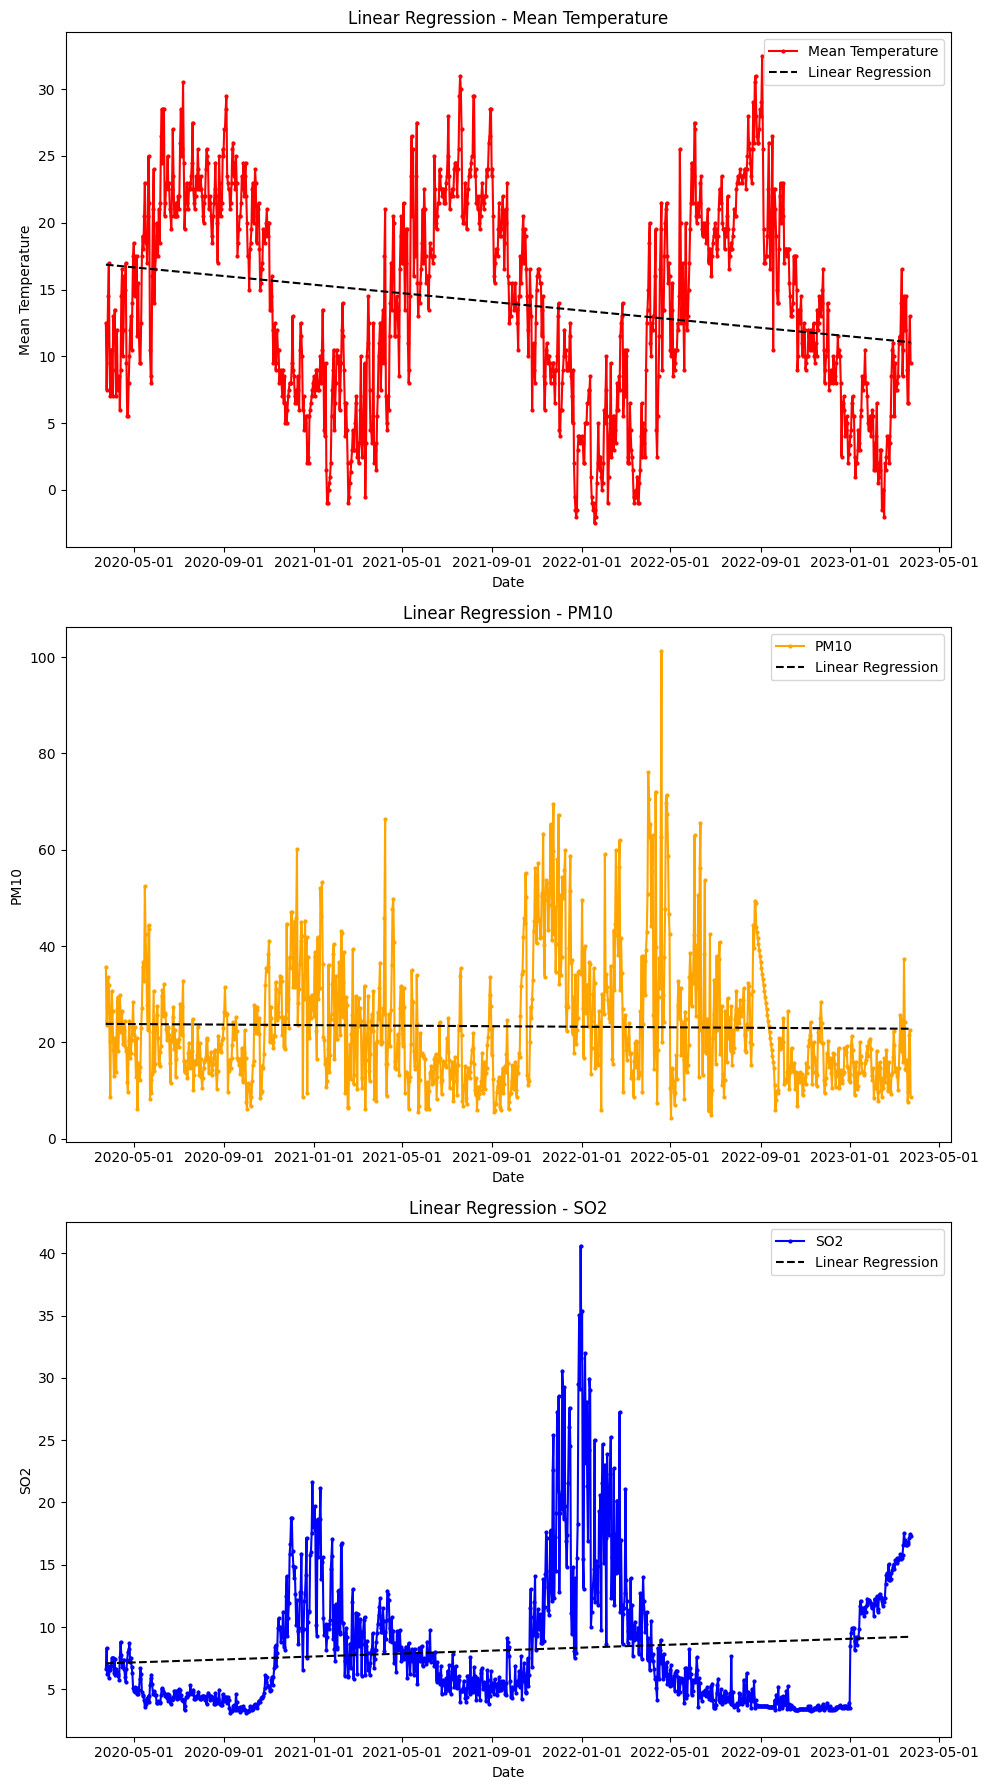

In [ ]:
# ------ Lineer Regresyon---------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# CSV dosyasını oku ve veri çerçevesini oluştur
data = pd.read_csv('/content/filled_data.csv')

# Tarih sütununu datetime formatına dönüştür
data['Date'] = pd.to_datetime(data['Date'])

# Sütun isimlerini al
columns = data.columns[1:]

# Grafikleri çizmek için subplotlar oluştur
fig, axs = plt.subplots(len(columns), figsize=(10, 6*len(columns)))

# Renkler
colors = ['red', 'orange', 'blue']

# Her bir sütun için doğrusal regresyon uygula ve grafik çiz
for i, column in enumerate(columns):
    # Doğrusal regresyon modelini oluştur
    regression_model = LinearRegression()

    # Bağımsız değişken (x) olarak tarihi kullanıyoruz
    X = mdates.date2num(data['Date'].values.reshape(-1, 1))

    # Hedef değişken (y) olarak sütunu kullanıyoruz
    y = data[column].values

    # Modeli eğit
    regression_model.fit(X, y)

    # Eğilim doğrusunu tahminle
    y_pred = regression_model.predict(X)

    # Grafik oluştur
    ax = axs[i]
    ax.plot(data['Date'], y, marker='o', linestyle='-', color=colors[i], label=column, markersize=2)
    ax.plot(data['Date'], y_pred, linestyle='--', color='black', label='Linear Regression', markersize=2)
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.set_title(f'Linear Regression - {column}')
    ax.legend()
    ax.grid(False)

    # Tarih etiketlerini düzenle
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Grafikleri göster
plt.tight_layout()
plt.show()
